In [54]:
#prerequisites
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
print(sns.get_dataset_names())
data = sns.load_dataset("titanic")
df=pd.DataFrame(data)
df

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [55]:
df=df[["survived","pclass","sex","age","fare"]]
df.dropna(inplace=True)
df

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
885,0,3,female,39.0,29.1250
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
889,1,1,male,26.0,30.0000


In [56]:



#divide the dataset 
x=df.drop("survived",axis=1)
y=df["survived"]

#endcoding 
from sklearn.preprocessing import LabelEncoder


labelEncoder = LabelEncoder()
x["sex"] = labelEncoder.fit_transform(x["sex"])



In [57]:
#split the data and then notrmalise it 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [58]:

#build the neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
model = Sequential()
model.add(Dense(units=6, activation="relu", input_dim=x_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(units=6, activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"] )


In [59]:
history=model.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.5604 - loss: 0.7296 - val_accuracy: 0.5455 - val_loss: 0.6416
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5429 - loss: 0.7033 - val_accuracy: 0.5804 - val_loss: 0.6336
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5447 - loss: 0.6934 - val_accuracy: 0.6014 - val_loss: 0.6294
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5622 - loss: 0.6762 - val_accuracy: 0.6364 - val_loss: 0.6259
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5797 - loss: 0.6681 - val_accuracy: 0.6573 - val_loss: 0.6210
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5849 - loss: 0.6673 - val_accuracy: 0.6923 - val_loss: 0.6189
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6025 - loss: 0.6626 - val_accuracy: 0.7063 - val_loss: 0.6153
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6287 - loss: 0.6441 - val_accuracy: 0.7203 - v

Accuracy per Epoch : 

Epoch 1 -> Training Accuracy : 56.04% , Validation Accuracy : 54.55%
Epoch 2 -> Training Accuracy : 54.29% , Validation Accuracy : 58.04%
Epoch 3 -> Training Accuracy : 54.47% , Validation Accuracy : 60.14%
Epoch 4 -> Training Accuracy : 56.22% , Validation Accuracy : 63.64%
Epoch 5 -> Training Accuracy : 57.97% , Validation Accuracy : 65.73%
Epoch 6 -> Training Accuracy : 58.49% , Validation Accuracy : 69.23%
Epoch 7 -> Training Accuracy : 60.25% , Validation Accuracy : 70.63%
Epoch 8 -> Training Accuracy : 62.87% , Validation Accuracy : 72.03%
Epoch 9 -> Training Accuracy : 65.50% , Validation Accuracy : 71.33%
Epoch 10 -> Training Accuracy : 65.85% , Validation Accuracy : 69.93%
Epoch 11 -> Training Accuracy : 64.97% , Validation Accuracy : 70.63%
Epoch 12 -> Training Accuracy : 69.35% , Validation Accuracy : 69.93%
Epoch 13 -> Training Accuracy : 66.90% , Validation Accuracy : 67.83%
Epoch 14 -> Training Accuracy : 67.60% , Validation Accuracy : 69.23%
Epoch 

TypeError: 'str' object is not callable

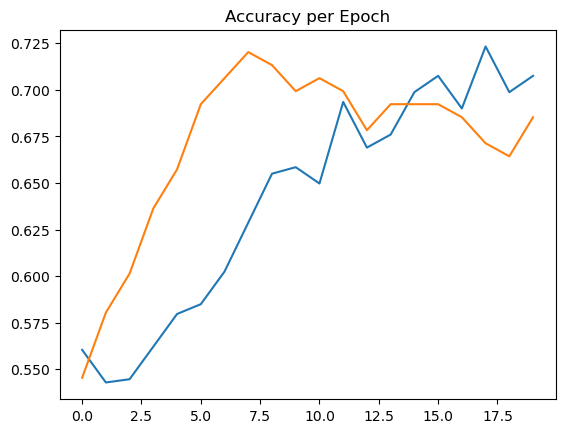

In [60]:
print("Accuracy per Epoch : \n")
train_acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
for i in range(len(train_acc)):
    print(f"Epoch {i+1} -> Training Accuracy : {train_acc[i]*100:.2f}% , Validation Accuracy : {val_acc[i]*100:.2f}%")
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [51]:
y_pred=model.predict(x_test)
y_pred = (y_pred > 0.5)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step 


In [52]:
#evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix : ")
print(confusion_matrix(y_test,y_pred))

Accuracy Score :  0.7552447552447552
Confusion Matrix : 
[[71 16]
 [19 37]]
